# **HTR sorter**

## **(1) Treat raw data**

In [4]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Define the list of cage types
## Note that the original code contains the two `2-8-3` cage types, which is a mistake. 
cage_types = [
    "0-12-0:", "0-12-2:", "0-12-3:", "0-12-4:", "0-12-5:", "0-12-6:", "0-12-8:",
    "1-10-2:", "1-10-3:", "1-10-4:", "2-8-1:", "2-8-2:", "2-8-3:",
    "3-6-3:"
]

folder = './raw_folder'

# Prepare the CSV file with headers
with open('output.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Time Step (ns)'] + cage_types)

    # Iterate through the text files
    for file_name in sorted(os.listdir(folder), key=lambda x: int(x.split('.')[0])):
        file_path = os.path.join(folder, file_name)
        time_step = file_name.split('.')[0]

        # Read the text file and parse the cage type counts
        cage_counts = {cage: 0 for cage in cage_types}
        with open(file_path, 'r') as txtfile:
            for line in txtfile:
                for cage in cage_types:
                    if line.startswith(cage):
                        cage_counts[cage] = int(line.strip().split(':')[1])
                        break

        # Write the cage counts for the current time step to the CSV file
        csv_writer.writerow([time_step] + [cage_counts[cage] for cage in cage_types])

## **(2) Plot HTR**

In [5]:
# Rcparams settings
rcParams['font.family'] = 'sans-serif'

# Check whether Arial or SF Pro Display are installed in the computer
try:
    rcParams['font.sans-serif'] = ['SF Pro Display']
except:
    try:
        rcParams['font.sans-serif'] = ['Arial']
    except:
        print("ERROR Note that Arial and SF Pro are not installed in the computer. The program will use the default font.")
        pass

# Label should be far away from the axes
rcParams['axes.labelpad'] = 8
rcParams['xtick.major.pad'] = 7
rcParams['ytick.major.pad'] = 7

# Add minor ticks
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

# Tick width
rcParams['xtick.major.width'] = 1
rcParams['ytick.major.width'] = 1
rcParams['xtick.minor.width'] = 0.5
rcParams['ytick.minor.width'] = 0.5

# Tick length
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 5
rcParams['xtick.minor.size'] = 3
rcParams['ytick.minor.size'] = 3

# Tick color
rcParams['xtick.color'] = 'black'
rcParams['ytick.color'] = 'black'

rcParams['font.size'] = 14
rcParams['axes.titlepad'] = 10
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.titlesize'] = 18

# Axes settings
rcParams['axes.labelweight'] = 'bold'
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 16
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Legend font settings
rcParams['legend.fontsize'] = 11
rcParams['legend.title_fontsize'] = 12
rcParams['legend.frameon'] = True

### **Cage number plotting**

Button(description='Plot!', style=ButtonStyle())

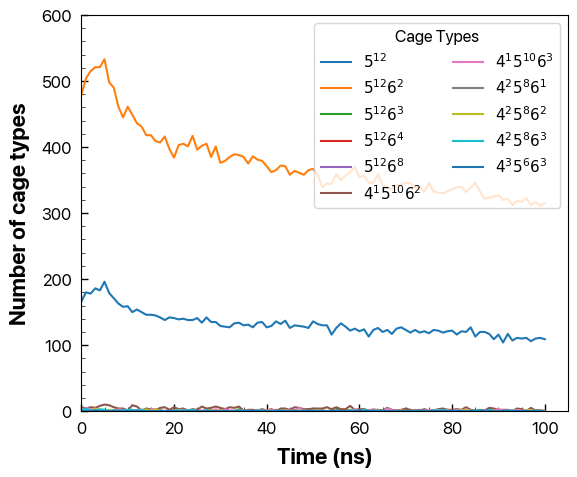

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import ipywidgets as widgets
from IPython.display import display

# Read the data from the CSV file
data = pd.read_csv('output.csv')

# Set the index to 'Time Step (ns)'
data.set_index('Time Step (ns)', inplace=True)

# Create a mapping dictionary for cage type labels
cage_type_labels = {
    "0-12-0:": r"$5^{12}$",
    "0-12-2:": r"$5^{12}6^{2}$",
    "0-12-3:": r"$5^{12}6^{3}$",
    "0-12-4:": r"$5^{12}6^{4}$",
    "0-12-5:": r"$5^{12}6^{5}$",
    "0-12-6:": r"$5^{12}6^{6}$",
    "0-12-8:": r"$5^{12}6^{8}$",
    "1-10-2:": r"$4^1 5^{10}6^{2}$",
    "1-10-3:": r"$4^1 5^{10}6^{3}$",
    "1-10-4:": r"$4^1 5^{10}6^{4}$",
    "2-8-1:": r"$4^2 5^8 6^1$",
    "2-8-2:": r"$4^2 5^8 6^2$",
    "2-8-3:": r"$4^2 5^8 6^3$",
    "3-6-3:": r"$4^3 5^6 6^3$",
}

# Update the column names of the DataFrame
data.rename(columns=cage_type_labels, inplace=True)

# Create checkboxes for each cage type
checkboxes = [widgets.Checkbox(value=True, description=label) for label in data.columns]

# Display checkboxes
checkbox_container = widgets.VBox(checkboxes)
display(checkbox_container)

# Define a function to plot the selected cage types
def plot_selected_cage_types(button):
    # Filter the DataFrame based on the selected cage types
    selected_cage_types = [checkbox.description for checkbox in checkboxes if checkbox.value]
    filtered_data = data[selected_cage_types]

    # Plot the data
    fig, ax = plt.subplots(figsize=(6, 5))
    filtered_data.plot(ax=ax)

    # Set labels and title
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Number of cage types')

    # Set x, y axes limits
    ax.set_xlim(0, )
    ax.set_ylim(0, 600)

    # Add a legend (2 columns)
    ax.legend(title='Cage Types', loc='upper right', ncol=2)

    # Show the plot
    plt.tight_layout()
    plt.savefig('Number_of_cage_types.png', dpi=300)

# Create a button for plotting the selected cage types
plot_button = widgets.Button(description="Plot!")
plot_button.on_click(plot_selected_cage_types)
display(plot_button)

### **Cage number changes**

Button(description='Plot', style=ButtonStyle())

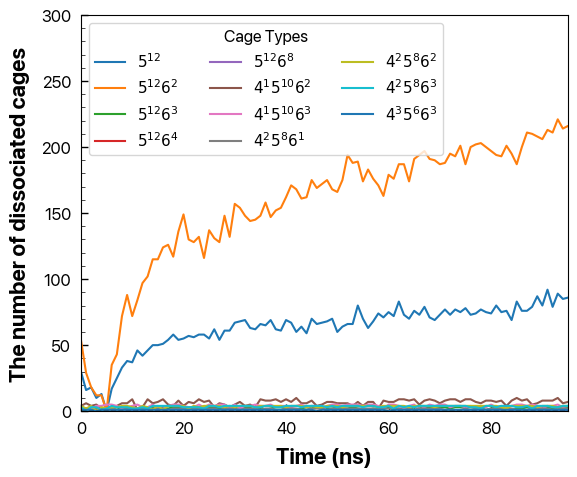

In [7]:
# Define a function to plot the absolute changes in selected cage types from the initial value
def plot_absolute_changes_from_initial_value(button):
    # Filter the DataFrame based on the selected cage types
    selected_cage_types = [checkbox.description for checkbox in checkboxes if checkbox.value]
    filtered_data = data[selected_cage_types]

    # Calculate the absolute changes in cage numbers from the max value
    changes_from_initial = abs(filtered_data - filtered_data.max())

    # Plot the data
    fig, ax = plt.subplots(figsize=(6, 5))
    changes_from_initial.plot(ax=ax)

    # Set labels and title
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('The number of dissociated cages')

    # Set x, y axes limits
    ax.set_xlim(0, 95)
    ax.set_ylim(0, 300)

    # Add the max value with axhline in x = 100 ns
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    
    # Add a legend
    ax.legend(title='Cage Types', loc='upper left', ncol=3)


    # Show the plot
    plt.tight_layout()
    plt.savefig('Absolute_changes_from_initial_number_of_cage_types.png', dpi=300)

# Create a button for plotting the absolute changes in selected cage types from the initial value
plot_absolute_changes_from_initial_button = widgets.Button(description="Plot")
plot_absolute_changes_from_initial_button.on_click(plot_absolute_changes_from_initial_value)
display(plot_absolute_changes_from_initial_button)

### **Cage number ratio changes**

Button(description='Plot!', style=ButtonStyle())

Button(description='Plot Ratio', style=ButtonStyle())

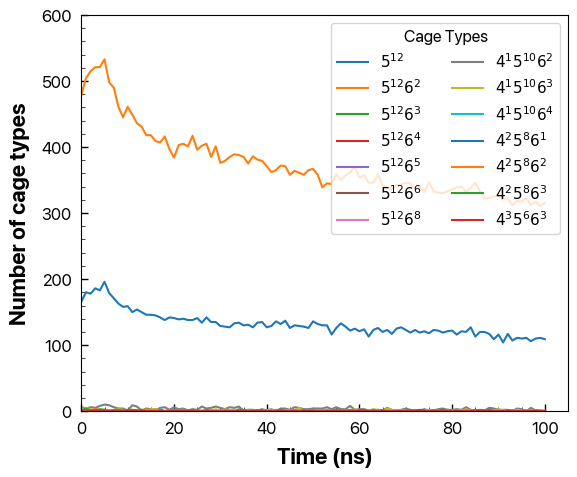

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import ipywidgets as widgets
from IPython.display import display

# Read the data from the CSV file
data = pd.read_csv('output.csv')

# Set the index to 'Time Step (ns)'
data.set_index('Time Step (ns)', inplace=True)

# Create a mapping dictionary for cage type labels
cage_type_labels = {
    "0-12-0:": r"$5^{12}$",
    "0-12-2:": r"$5^{12}6^{2}$",
    "0-12-3:": r"$5^{12}6^{3}$",
    "0-12-4:": r"$5^{12}6^{4}$",
    "0-12-5:": r"$5^{12}6^{5}$",
    "0-12-6:": r"$5^{12}6^{6}$",
    "0-12-8:": r"$5^{12}6^{8}$",
    "1-10-2:": r"$4^1 5^{10}6^{2}$",
    "1-10-3:": r"$4^1 5^{10}6^{3}$",
    "1-10-4:": r"$4^1 5^{10}6^{4}$",
    "2-8-1:": r"$4^2 5^8 6^1$",
    "2-8-2:": r"$4^2 5^8 6^2$",
    "2-8-3:": r"$4^2 5^8 6^3$",
    "3-6-3:": r"$4^3 5^6 6^3$",
}

# Update the column names of the DataFrame
data.rename(columns=cage_type_labels, inplace=True)

# Create checkboxes for each cage type
checkboxes = [widgets.Checkbox(value=True, description=label) for label in data.columns]

# Display checkboxes
checkbox_container = widgets.VBox(checkboxes)
display(checkbox_container)

# Define a function to plot the selected cage types
def plot_selected_cage_types(button):
    # Filter the DataFrame based on the selected cage types
    selected_cage_types = [checkbox.description for checkbox in checkboxes if checkbox.value]
    filtered_data = data[selected_cage_types]

    # Plot the data
    fig, ax = plt.subplots(figsize=(6, 5))
    filtered_data.plot(ax=ax)

    # Set labels and title
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Number of cage types')

    # Set x, y axes limits
    ax.set_xlim(0, )
    ax.set_ylim(0, 600)

    # Add a legend (2 columns)
    ax.legend(title='Cage Types', loc='upper right', ncol=2)

    # Show the plot
    plt.tight_layout()
    plt.savefig('Number_of_cage_types.png', dpi=300)

# Create a button for plotting the selected cage types
plot_button = widgets.Button(description="Plot!")
plot_button.on_click(plot_selected_cage_types)
display(plot_button)

# Define a function to plot the ratio changes in selected cage types from the initial value
def plot_ratio_changes_from_initial_value(button):
    # Filter the DataFrame based on the selected cage types
    selected_cage_types = [checkbox.description for checkbox in checkboxes if checkbox.value]
    filtered_data = data[selected_cage_types]

    # Calculate the ratio changes in cage numbers from the initial value
    ratio_changes_from_initial = (filtered_data / filtered_data.iloc[0]) - 1

    # Plot the data
    fig, ax = plt.subplots(figsize=(6, 5))
    ratio_changes_from_initial.plot(ax=ax)

    # Set labels and title
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Cage number ratio changes')

    # Set x, y axes limits
    ax.set_xlim(0, )
    ax.set_ylim(-1, 0)

    # Add the max value with axhline in x = 100 ns
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    
    # Add a legend
    ax.legend(title='Cage Types', loc='lower left', ncol=2)

    # Show the plot
    plt.tight_layout()
    plt.savefig('Ratio_changes_from_initial_number_of_cage_types.png', dpi=300)

# Create a button for plotting the ratio changes in selected cage types from the initial value
plot_ratio_changes_from_initial_button = widgets.Button(description="Plot Ratio")
plot_ratio_changes_from_initial_button.on_click(plot_ratio_changes_from_initial_value)
display(plot_ratio_changes_from_initial_button)

### **Crystallinity calculation for sI and sII hydrates**

Button(description='Plot crystallinity!', style=ButtonStyle())

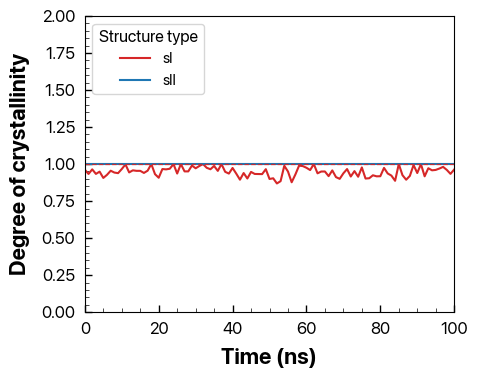

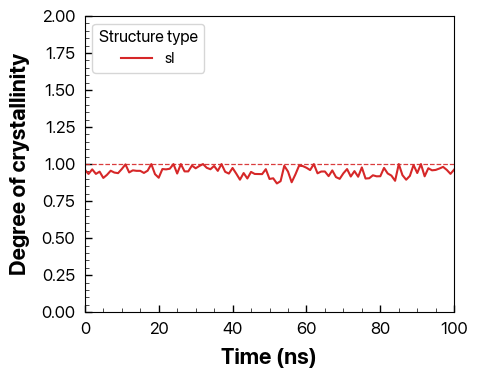

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import ipywidgets as widgets
from IPython.display import display

# Read the data from the CSV file
data = pd.read_csv('output.csv')

# Set the index to 'Time Step (ns)'
data.set_index('Time Step (ns)', inplace=True)

# Update the column names of the DataFrame
data.rename(columns=cage_type_labels, inplace=True)

# Calculate the sI_crystallinity and sII_crystallinity
data['sI_crystallinity'] = data["$5^{12}6^{2}$"] / data["$5^{12}$"]
data['sII_crystallinity'] = data["$5^{12}$"] / data["$5^{12}6^{4}$"]

# Calculate the degree of crystallinity
data['degree_of_crystallinity_sI'] = data['sI_crystallinity'].apply(lambda x: max(0, min(1, x / 3)))
data['degree_of_crystallinity_sII'] = data['sII_crystallinity'].apply(lambda x: max(0, min(1, x / 2)))

# Create checkboxes for sI and sII
checkbox_sI = widgets.Checkbox(value=True, description='sI Crystallinity')
checkbox_sII = widgets.Checkbox(value=True, description='sII Crystallinity')

# Display checkboxes
checkbox_container = widgets.VBox([checkbox_sI, checkbox_sII])
display(checkbox_container)

# Define a function to plot the selected crystallinity types
def plot_selected_crystallinity_types(button):
    # Filter the DataFrame based on the selected crystallinity types
    selected_crystallinity_types = []

    if checkbox_sI.value:
        selected_crystallinity_types.append('degree_of_crystallinity_sI')
    if checkbox_sII.value:
        selected_crystallinity_types.append('degree_of_crystallinity_sII')

    filtered_data = data[selected_crystallinity_types]

    # Plot the data
    fig, ax = plt.subplots(figsize=(5, 4))
    filtered_data.plot(ax=ax, color = ['tab:red', 'tab:blue'])

    # Set labels and title
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Degree of crystallinity')

    ax.set_xlim(0, 100)
    ax.set_ylim(0, 2)

    # Add the dotted line to show the complete crystallinity (which is y = 1)
    ax.axhline(y=1, color='tab:red', linestyle='--', linewidth=0.9, alpha=0.9)

    # Add a legend
    ax.legend(title='Crystallinity type', loc='upper left')

    ## Modify the legend label as `sI` and `sII`
    handles, labels = ax.get_legend_handles_labels()
    labels = ['sI', 'sII']
    ax.legend(handles, labels, title='Structure type', loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.savefig('Degree_of_crystallinity.png', dpi=300)

# Create a button for plotting the selected crystallinity types
plot_button = widgets.Button(description="Plot crystallinity!")
plot_button.on_click(plot_selected_crystallinity_types)
display(plot_button)